# =================  HOUSE PREDICTION =====================

>AIM: WE HAVE TO CALCUALTE THE PRICE OF THE HOUSE WITH SOME FEATURES.

# Features

> No of squarefeet area

> How many Bedrooms--,bathrooms--,guestroom--,basement-- and so on are there 



# Additional Needs

> hotwaterheating

>airconditioning

>prefarea

>furnishingstatus

# Setup

In [1]:
import pandas as pd
import numpy as np

# Get the Data

In [2]:
df=pd.read_csv('/Users/kirandeepkaur/Downloads/datasets/housing.csv')

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
df['airconditioning'].value_counts(normalize=True)

no     0.684404
yes    0.315596
Name: airconditioning, dtype: float64

In [5]:
df['furnishingstatus'].value_counts(normalize=True)

semi-furnished    0.416514
unfurnished       0.326606
furnished         0.256881
Name: furnishingstatus, dtype: float64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


<AxesSubplot:xlabel='price'>

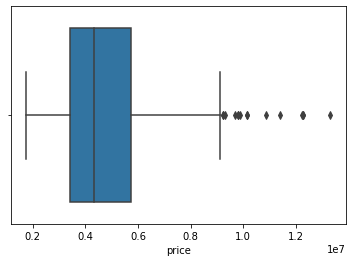

In [86]:
sns.boxplot(x='price',data=df)

<AxesSubplot:xlabel='area'>

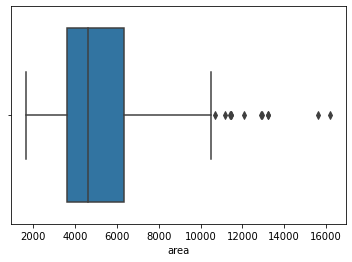

In [87]:
sns.boxplot(x='area',data=df)

<AxesSubplot:>

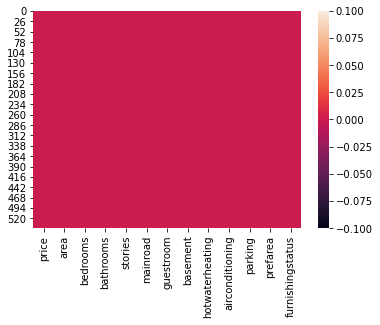

In [8]:
sns.heatmap(df.isnull())

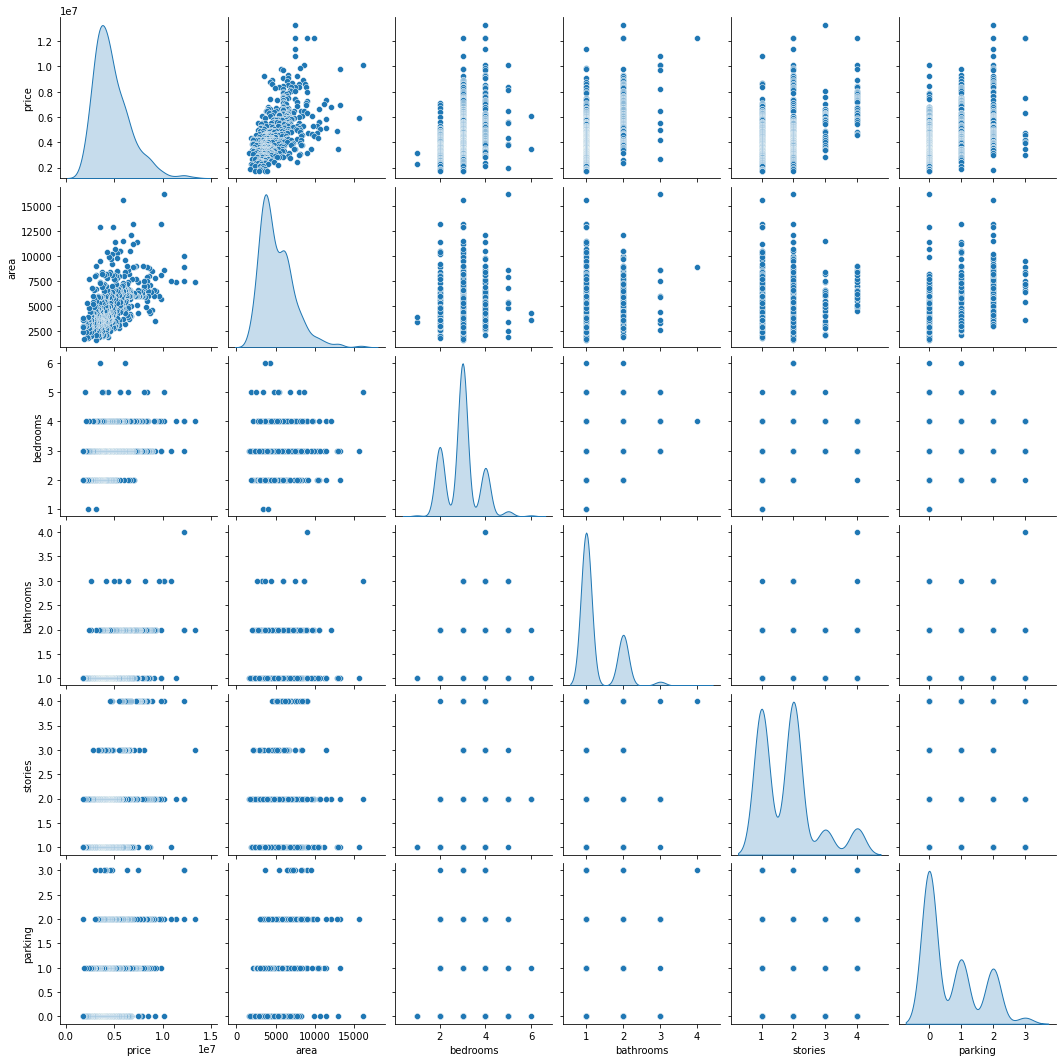

In [9]:
import seaborn as sns
sns.pairplot(data=df,diag_kind='kde')

In [10]:
cormat=df.corr()
cormat

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<AxesSubplot:>

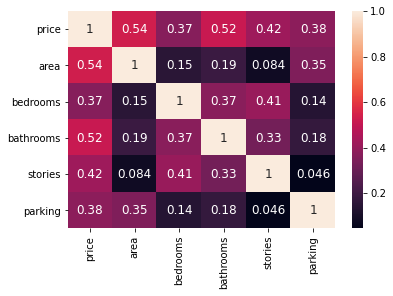

In [11]:
sns.heatmap(cormat,annot=True,annot_kws={'size':12})

# Preparing Data for Machine learning algorithms

In [12]:
df["mainroad"] = df["mainroad"].astype('category').cat.codes
df["basement"] = df["basement"].astype('category').cat.codes
df["hotwaterheating"] = df["hotwaterheating"].astype('category').cat.codes
df["airconditioning"] = df["airconditioning"].astype('category').cat.codes
df["furnishingstatus"] = df["furnishingstatus"].astype('category').cat.codes
df["prefarea"] = df["prefarea"].astype('category').cat.codes
df["guestroom"] = df["guestroom"].astype('category').cat.codes

In [13]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [14]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad             int8
guestroom            int8
basement             int8
hotwaterheating      int8
airconditioning      int8
parking             int64
prefarea             int8
furnishingstatus     int8
dtype: object

>>>> Trying to find  the  best feature for the target column 

Elapsed time to compute the importances: 0.010 seconds


<Figure size 1296x288 with 0 Axes>

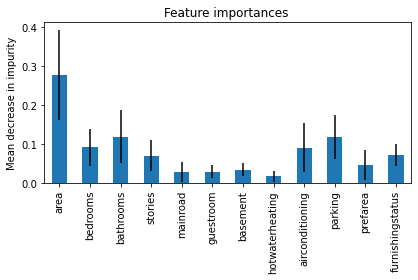

<Figure size 1296x288 with 0 Axes>

In [102]:
import time
import matplotlib.pyplot as plt
start_time = time.time()
importances = Rfr.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in Rfr.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances ")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.figure(figsize=(18,4))

 > Wooahh!!! area is somewhere shows importances to the target variable

                                     *******************************

## Now let's Select and Train the Model

In [15]:
from sklearn.model_selection import train_test_split
X=df.drop("price",axis=1)
y=df[['price']]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [17]:

lr=LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
lr.score(X_test,y_test)

0.7235015223200351

In [20]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [21]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score#
def show_scores(model):
    train_preds = lr.predict(X_train)
    val_preds = lr.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

# Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
np.random.seed(30)
data_one = df.sample(frac=1)

X = data_one.drop("price", axis=1)
y = data_one["price"]

train_split=round(0.7*len(data_one))
valid_split=round(train_split+0.15*len(data_one))
X_train,y_train=X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]


linear_regression=LinearRegression({'copy_X': True, 'fit_intercept' :True, 'n_jobs' :True,  'normalize':True})
linear_regression.fit(X_train,y_train)


y_preds=m.predict(X_valid)
baseline_metrics=show_scores(lr)

baseline_metrics

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass fit_intercept={'copy_X': True, 'fit_intercept': True, 'n_jobs': True, 'normalize': True} as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


{'Training MAE': 815448.7811331968,
 'Valid MAE': 759297.1617001616,
 'Training R^2': 0.6649415190171106,
 'Valid R^2': 0.6051362127813261}

In [51]:
linear_regression.score(X_test,y_test)

0.7541187482996923

In [ ]:
model={"Lasso Regression":Lasso
       "Ridge":Ridge
       "RandomForestRegressor":RandomForestRegressor()
       "SVM":SVM
       ""}

# Ridge Regression

In [56]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=1,solver='cholesky')
Ridge.fit(X_train, y_train)

Ridge(alpha=1, solver='cholesky')

In [57]:
Ridge.score(X_test,y_test)

0.7535394418699256

# Lasso Regression

In [60]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(X_train, y_train)

Lasso(alpha=0.2)

In [61]:
Lasso.score(X_test,y_test)

0.7541186457508718

## Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor as rfr
Rfr = rfr()
Rfr.fit(X_train,y_train)
x_train_pred = Rfr.predict(X_train)
x_test_pred = Rfr.predict(X_test)


In [29]:
x_train_pred

array([ 3727850.        ,  4971995.        ,  6920830.        ,
        5780180.        ,  4251030.        ,  3588690.        ,
        5742870.        ,  3099740.        ,  4466910.        ,
        3870968.5       ,  4132310.        ,  3865890.        ,
        6787900.        ,  3173380.        ,  3926930.        ,
        4885685.        ,  4163740.        ,  4637920.        ,
        3417067.5       ,  2760730.        ,  5042590.        ,
        2838255.        ,  5274080.        ,  5474140.        ,
        7961409.4       ,  5868100.        ,  3892361.66666667,
        2493960.        ,  8090909.4       ,  5077800.        ,
        6603660.        ,  7229530.        ,  4907420.        ,
        4272590.        ,  6894020.        ,  3615010.        ,
        7574677.6       ,  4452840.        ,  2390990.        ,
        4883410.        ,  7870730.        ,  5363470.        ,
        7131174.4       ,  5506130.        ,  2777810.        ,
       10930208.8       ,  5586700.     

In [30]:
Rfr.score(X_test,y_test)

0.7276298120830003

# hyperparamtrer tuning on random forest regressor`

In [81]:

from sklearn.model_selection import GridSearchCV

param_grid = [

    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

random_forest = rfr(random_state=42)
grid_search = GridSearchCV(random_forest, param_grid, cv=5,
                            return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True)

In [82]:
grid_search.score(X_test,y_test)

0.7512577532571605

In [41]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [46]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [52]:
Rfr = rfr(n_estimators=30,max_features=2,random_state=42,oob_score=True)
Rfr.fit(X_train,y_train)
x_train_pred = Rfr.predict(X_train)
x_test_pred = Rfr.predict(X_test)


In [84]:
dat_a={'mainroad':0,'guestroom':1,'basement':1,'hotwaterheating':0,'airconditioning':0,'prefarea':1,'furnishingstatus':2,'bedroom_new':3,'area_new':6360,'bathroom_new':2,'stories_new':2,'parking_new':1}

index=[1]

customer=pd.DataFrame(dat_a,index)

In [85]:
predi=grid_search.predict(customer)
print(predi)

[4420266.66666667]
